In [24]:
## Rossmann Store Sales Data Preprocessing

# Imports and setup
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

root = Path.cwd().parent # Define the root directory


In [25]:
# Load datasets
train_df = pd.read_csv(root/'data'/'train.csv')
store_df = pd.read_csv(root/'data'/'store.csv')

# Quick peek: train.csv
train_df.head()


C:\Users\oscar.carrasco.heine\AppData\Local\Temp\ipykernel_8488\1867336299.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(root/'data'/'train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [26]:
# Quick peek: store.csv
store_df.head()


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [27]:
df = train_df.merge(store_df, how='left', on='Store')

# Quick peek
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [28]:
# Check missing values
print(df.isnull().sum())


Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64


📈 **Let us visualize the evolution of sales for a sample of stores:**

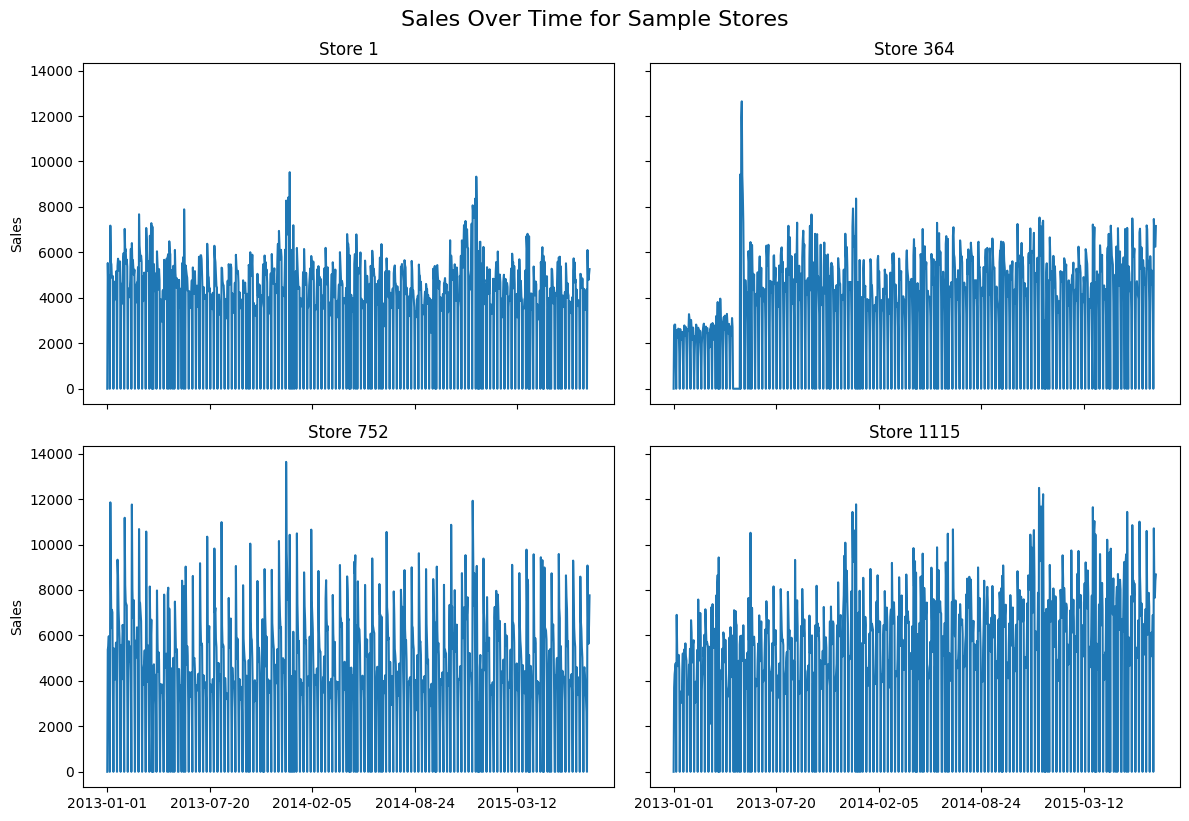

In [29]:
# Choose 4 store IDs
store_ids = [1, 364, 752, 1115]

# Create subplots: 2 rows × 2 columns
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop over the store IDs and corresponding axes
for i, store_id in enumerate(store_ids):
    store_data = df[df['Store'] == store_id]
    store_data.groupby('Date')['Sales'].sum().plot(ax=axes[i])
    axes[i].set_title(f'Store {store_id}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Sales')

plt.tight_layout()
plt.suptitle('Sales Over Time for Sample Stores', fontsize=16, y=1.02)
plt.show()


In [30]:
# Check if CompetitionOpenSinceMonth and Year are always missing together

month_missing = df['CompetitionOpenSinceMonth'].isnull()
year_missing = df['CompetitionOpenSinceYear'].isnull()

# Compare both masks
inconsistencies = df[month_missing != year_missing]

print(f"Number of inconsistent rows: {len(inconsistencies)}")
if len(inconsistencies) > 0:
    display(inconsistencies.head())
else:
    print("✅ Month and Year are always missing together.")


Number of inconsistent rows: 0
✅ Month and Year are always missing together.


In [31]:
# Check if missingness of Promo2SinceWeek, Promo2SinceYear, and PromoInterval perfectly matches Promo2 == 0

all_missing = (
    df['Promo2SinceWeek'].isnull() & 
    df['Promo2SinceYear'].isnull() & 
    df['PromoInterval'].isnull()
)

mismatch = df[all_missing != (df['Promo2'] == 0)]

print(f"Number of rows where missingness doesn't match Promo2 == 0: {len(mismatch)}")
if len(mismatch) > 0:
    display(mismatch.head())
else:
    print("✅ Missing Promo2SinceWeek, Promo2SinceYear, and PromoInterval perfectly match Promo2 == 0.")
 

Number of rows where missingness doesn't match Promo2 == 0: 0
✅ Missing Promo2SinceWeek, Promo2SinceYear, and PromoInterval perfectly match Promo2 == 0.


In [32]:
### Preliminary Feature Engineering

## Extract date features

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Break down into year, month, and day of the week
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek

In [33]:
# Handle missing values in Rossmann dataset

# Create a flag for missing values and fill missing CompetitionDistance with median
df['CompetitionDistanceMissing'] = df['CompetitionDistance'].isnull().astype(int)
df['CompetitionDistance'] = df['CompetitionDistance'].fillna(df['CompetitionDistance'].median())

# Flag missing competition open dates and fill missing values with the current row's date (assume competition just opened)
df['CompetitionOpenMissing'] = df['CompetitionOpenSinceYear'].isnull().astype(int)
df['CompetitionOpenSinceMonth'] = df['CompetitionOpenSinceMonth'].fillna(df['Date'].dt.month)
df['CompetitionOpenSinceYear'] = df['CompetitionOpenSinceYear'].fillna(df['Date'].dt.year)

# Cast to int (original columns are float due to NaNs)
df['CompetitionOpenSinceMonth'] = df['CompetitionOpenSinceMonth'].astype(int)
df['CompetitionOpenSinceYear'] = df['CompetitionOpenSinceYear'].astype(int)

# Fill missing promo-related values for stores not participating in Promo2
df['Promo2SinceYear'] = df['Promo2SinceYear'].fillna(0).astype(int)
df['Promo2SinceWeek'] = df['Promo2SinceWeek'].fillna(0).astype(int)
df['PromoInterval'] = df['PromoInterval'].fillna('None')

# Confirm all missing values are handled
missing = df.isnull().sum()
missing = missing[missing > 0]

if missing.empty:
    print("Remaining missing values: 0")
else:
    print("Remaining missing values:\n")
    print(missing)


Remaining missing values: 0


🔧 FEATURE ENGINEERING:



In [34]:
## Compute months since competition opened

# Create datetime for competition opening
df['CompetitionOpenSince'] = pd.to_datetime(
    {
        'year': df['CompetitionOpenSinceYear'],
        'month': df['CompetitionOpenSinceMonth'],
        'day': 1
    }
)

# Calculate difference in months between 'Date' and 'CompetitionOpenSince'
df['MonthsSinceCompOpened'] = (
    (df['Date'].dt.year - df['CompetitionOpenSince'].dt.year) * 12 +
    (df['Date'].dt.month - df['CompetitionOpenSince'].dt.month)
).clip(lower=0).fillna(0).astype(int)


In [35]:
##  Define IsPromoIntervalActive (1 if promo active during this month, else 0)

# Mapping month names to numbers
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sept': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

# Function to determine if the promo is active in the current month
def promo_active(row):
    if pd.isna(row['PromoInterval']) or row['PromoInterval'] in ['None', '']:
        return 0
    promo_months = [month_map[month] for month in row['PromoInterval'].split(',')]
    return int(row['Date'].month in promo_months)

# Apply function row-wise
df['IsPromoIntervalActive'] = df.apply(promo_active, axis=1)


In [36]:
## Additional date features

# Week of the year (1–52)
df['WeekOfYear'] = df['Date'].dt.isocalendar().week.astype(int)

# Days since start of dataset (continuous time progression)
df['DaysSinceStart'] = (df['Date'] - df['Date'].min()).dt.days


In [37]:
## Label Encoding for Categorical Features

from sklearn.preprocessing import LabelEncoder

categorical_cols = ['StateHoliday', 'StoreType', 'Assortment']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Cast all values to string
    label_encoders[col] = le

print("✅ Label encoding applied (with type-safe conversion) to:", categorical_cols)


✅ Label encoding applied (with type-safe conversion) to: ['StateHoliday', 'StoreType', 'Assortment']


In [38]:
# Drop columns not needed for modeling
df = df.drop(columns=[
    'Customers',
    'Date',
    'CompetitionOpenSince',
    'CompetitionOpenSinceMonth',
    'CompetitionOpenSinceYear',
    'PromoInterval'
    ]
)


In [39]:
# Preview the updated DataFrame
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Store                       1017209 non-null  int64  
 1   DayOfWeek                   1017209 non-null  int32  
 2   Sales                       1017209 non-null  int64  
 3   Open                        1017209 non-null  int64  
 4   Promo                       1017209 non-null  int64  
 5   StateHoliday                1017209 non-null  int64  
 6   SchoolHoliday               1017209 non-null  int64  
 7   StoreType                   1017209 non-null  int64  
 8   Assortment                  1017209 non-null  int64  
 9   CompetitionDistance         1017209 non-null  float64
 10  Promo2                      1017209 non-null  int64  
 11  Promo2SinceWeek             1017209 non-null  int64  
 12  Promo2SinceYear             1017209 non-null  int64  
 1

,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,Promo2SinceWeek,Promo2SinceYear,Year,Month,CompetitionDistanceMissing,CompetitionOpenMissing,MonthsSinceCompOpened,IsPromoIntervalActive,WeekOfYear,DaysSinceStart
0,1,4,5263,1,1,0,1,2,0,1270.0,...,0,0,2015,7,0,0,82,0,31,941
1,2,4,6064,1,1,0,1,0,0,570.0,...,13,2010,2015,7,0,0,92,1,31,941
2,3,4,8314,1,1,0,1,0,0,14130.0,...,14,2011,2015,7,0,0,103,1,31,941
3,4,4,13995,1,1,0,1,2,2,620.0,...,0,0,2015,7,0,0,70,0,31,941
4,5,4,4822,1,1,0,1,0,0,29910.0,...,0,0,2015,7,0,0,3,0,31,941


In [ ]:
# Save final DataFrame to CSV
df.to_csv(root/'data'/'processed_data.csv', index=False)
